In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams['font.family'] = 'NanumGothicCoding'

/package/anaconda3.9/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
lst_year = []
lst_quarter = []

for i in range(1990, 2003):
    for j in range(1, 5):
        lst_year.append(i)

for i in range(1, 14):
    for j in range(1, 5):
        lst_quarter.append(j)

In [3]:
lst_index = []
for year in range(1990, 2003):
    for quarter in range(1, 5):
        index = '{}Q{}'.format(year, quarter)
        lst_index.append(index)

In [4]:
df = pd.read_csv('./data/4장 - 비계절형 ARIMA/군산해안용존산소량분석을위한프로그램.txt', header=None)
df.index = lst_index[:-2]
df.columns = ['산소량']
df['연도'] = lst_year[:-2]
df['분기'] = lst_quarter[:-2]
df = df[['연도', '분기', '산소량']]
df['루트 산소량'] = np.sqrt(df['산소량'])

In [5]:
df

,연도,분기,산소량,루트 산소량
1990Q1,1990,1,7.8,2.792848
1990Q2,1990,2,8.0,2.828427
1990Q3,1990,3,7.9,2.810694
1990Q4,1990,4,7.3,2.701851
1991Q1,1991,1,10.7,3.271085
1991Q2,1991,2,2.8,1.673320
1991Q3,1991,3,6.0,2.449490
1991Q4,1991,4,6.2,2.489980
1992Q1,1992,1,10.1,3.178050
1992Q2,1992,2,5.8,2.408319


# 모형식별의 단계

## 시도표(time plot)

### $\sqrt{z_t}$의 시도표

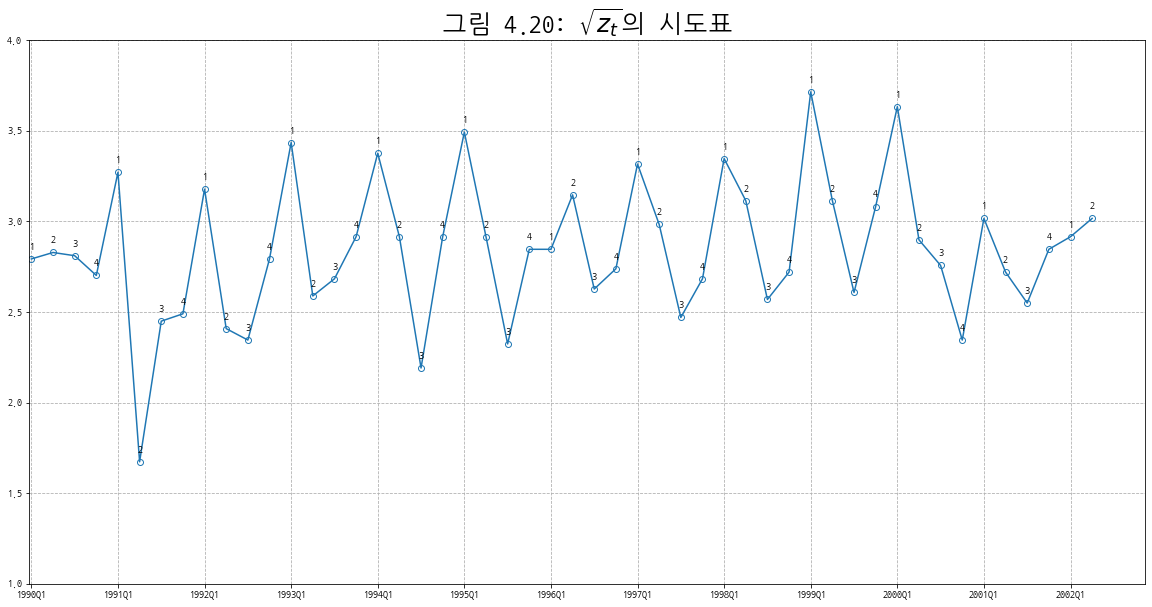

In [6]:
plt.title('그림 4.20: $\sqrt{z_t}$의 시도표', fontsize=25)
plt.plot(df['루트 산소량'], marker='o', markerfacecolor='none')
plt.xlim(-0.1)
plt.ylim(1, 4)
plt.xticks(df.index[::4])
plt.grid(True, linestyle='--')

for i in range(len(df)):
    height = df['루트 산소량'][i]
    plt.text(df.index[i], height+0.05, df['분기'][i], ha='center')
    
plt.show()

### 표 4.12

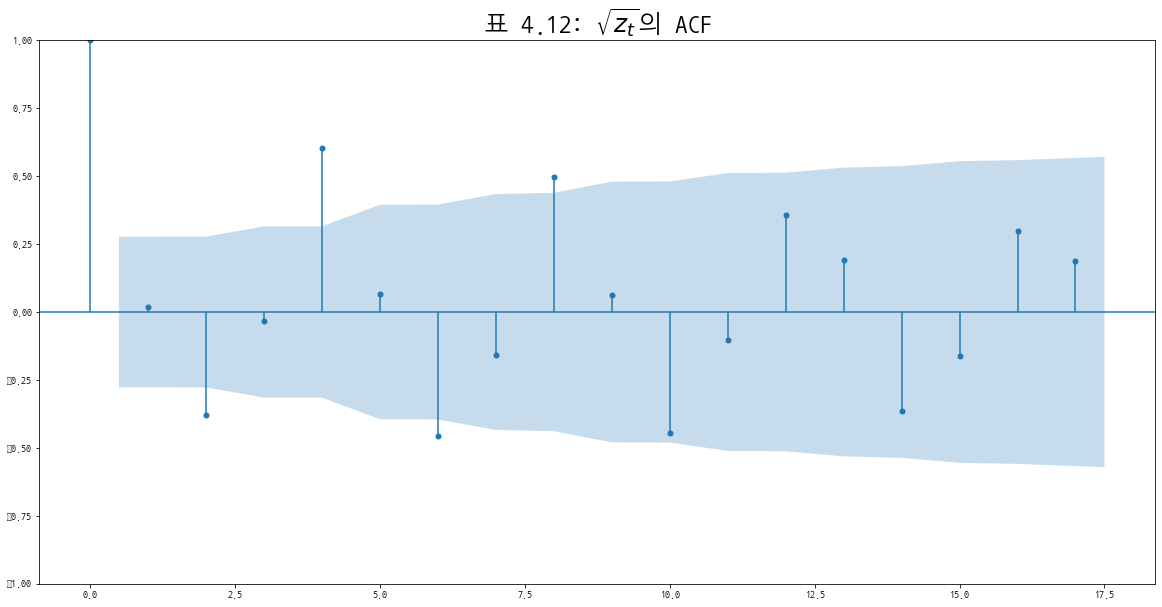

In [7]:
plot_acf(df['루트 산소량'])
plt.title('표 4.12: $\sqrt{z_t}$의 ACF', fontsize=25)
plt.show()

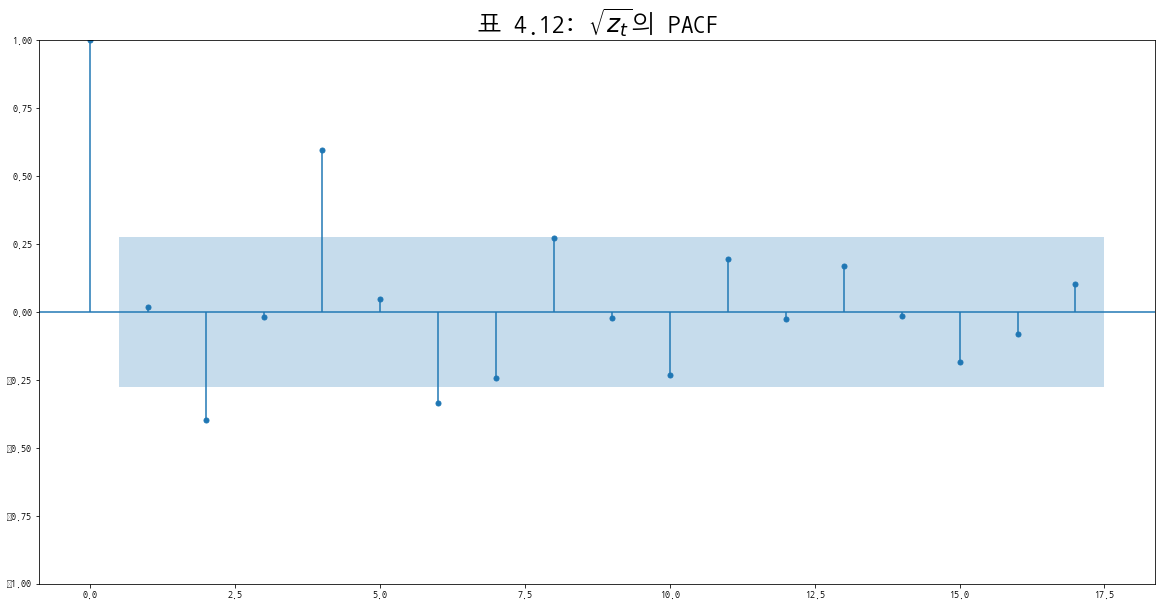

In [8]:
plot_pacf(df['루트 산소량'])
plt.title('표 4.12: $\sqrt{z_t}$의 PACF', fontsize=25)
plt.show()

# 모형 추정의 단계

## 표 4.13: $\sqrt{z_t}$ 모형 적합에 의한 모수추정치 및 기타 통계량

In [9]:
model = sm.tsa.arima.ARIMA(df['루트 산소량'], order=([2], 0, [2, 4]))
result = model.fit()
print(result.summary())

                                 SARIMAX Results                                 
Dep. Variable:                    루트 산소량   No. Observations:                   50
Model:             ARIMA([2], 0, [2, 4])   Log Likelihood                  -7.949
Date:                   Tue, 25 Apr 2023   AIC                             25.897
Time:                           17:44:08   BIC                             35.457
Sample:                       01-01-1990   HQIC                            29.538
                            - 04-01-2002                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8400      0.062     46.165      0.000       2.719       2.961
ar.L2         -0.9217      0.083    -11.051      0.000      -1.085      -0.758
ma.L2          0.9962      0

# 모형검진의 단계

## 표 4.14: 잔차 검정을 위한 포트만토 검정 통계치

In [10]:
# 모델의 잔차
residuals = result.resid

# 포트만트 검정
portmanteau = acorr_ljungbox(residuals, lags=24)
portmanteau

,lb_stat,lb_pvalue
1,0.005841,0.939079
2,0.029403,0.985406
3,0.030052,0.998627
4,0.619672,0.960853
5,0.843368,0.974185
6,1.159052,0.978859
7,2.126792,0.952490
8,2.225896,0.973291
9,2.641452,0.976834
10,2.755172,0.986613


In [11]:
portmanteau[5::6]

,lb_stat,lb_pvalue
6,1.159052,0.978859
12,3.096094,0.994827
18,8.712456,0.966036
24,12.818307,0.969021
